<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Run-Pipeline" data-toc-modified-id="Run-Pipeline-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Run Pipeline</a></span><ul class="toc-item"><li><span><a href="#Transit" data-toc-modified-id="Transit-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Transit</a></span></li><li><span><a href="#Background" data-toc-modified-id="Background-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Background</a></span></li><li><span><a href="#No-CO2" data-toc-modified-id="No-CO2-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>No CO2</a></span></li><li><span><a href="#No-N2" data-toc-modified-id="No-N2-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>No N2</a></span></li><li><span><a href="#Dry-Transit" data-toc-modified-id="Dry-Transit-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Dry Transit</a></span></li><li><span><a href="#No-Top" data-toc-modified-id="No-Top-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>No Top</a></span></li><li><span><a href="#OST" data-toc-modified-id="OST-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>OST</a></span></li></ul></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plotting</a></span><ul class="toc-item"><li><span><a href="#Standard-Depth-Plot" data-toc-modified-id="Standard-Depth-Plot-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Standard Depth Plot</a></span></li><li><span><a href="#Missing-Species" data-toc-modified-id="Missing-Species-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Missing Species</a></span></li><li><span><a href="#Ceiling-Analysis" data-toc-modified-id="Ceiling-Analysis-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Ceiling Analysis</a></span></li><li><span><a href="#OST" data-toc-modified-id="OST-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>OST</a></span></li></ul></li><li><span><a href="#Basemap-Phase-Analysis" data-toc-modified-id="Basemap-Phase-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Basemap Phase Analysis</a></span></li><li><span><a href="#Testing" data-toc-modified-id="Testing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Testing</a></span><ul class="toc-item"><li><span><a href="#TPC" data-toc-modified-id="TPC-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>TPC</a></span></li></ul></li></ul></div>

# Imports

In [67]:
import starcoder42 as s
import sys
sys.path.append("..")
import PSG
import glob
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
%matplotlib inline

In [87]:
s.reload(PSG)

<module 'PSG' from '..\\PSG.py'>

# Run Pipeline

## Transit

In [88]:
files = glob.glob("*cam.h0.avg.nc")
file = files[0]
print("Using file {}".format(file))

Using file trappist1e_1barN2_0.4barCO2_aqua.cam.h0.avg.nc


In [89]:
transit = PSG.PSG("TRAPPIST-1 e")
transit.fetch_archive()
transit.from_cdf(file)
transit.calculate(1e-6, 7)
#transit.write("MIRI-MRS")
#transit.send(run=True)
#transit.plot_setup()

Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written to trappist1e_1barN2_0.4barCO2_aqua_terminator.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere


## Background

In [71]:
bg = PSG.PSG("TRAPPIST-1 e")
bg.fetch_archive()
bg.from_cdf(file)
bg.calculate(1e-6, 7)

Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
7.22192691602103
    Output file written to trappist1e_1barN2_0.4barCO2_aqua_terminator.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere


In [6]:
bg.atmosphere["Pressure"] = 0.001
bg.atmosphere["Temperature"] *= 0
bg.atmosphere["N2"] *= 0
bg.atmosphere["CO2"] *= 0
bg.atmosphere["H2O"] *= 0
bg.atmosphere["LiquidCloud"] *= 0
bg.atmosphere["IceCloud"] *= 0
bg.planet_data["MWeightTotal"] = 0
bg.planet_data["IceCloudAbundance"] = 0
bg.planet_data["LiquidCloudAbundance"] = 0
bg.planet_data["SurfacePressure"] = 0.001
bg.n_layers = 1
bg.atmosphere = Table(bg.atmosphere[0])

In [7]:
bg.write("MIRI-MRS")
bg.send()
bg.plot_setup()

    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is trappist1e_1barN2_0.4barCO2_psginput.txt
Sending to PSG
    Successfully connected to NASA PSG
    5 files created
    PSG returned an error or warning:
ERROR | PUMAS | Vertical range (0.00-373372301500000.00 km) not within the altitude/distance range of the atmosphere (0.00-0.00 km). Verify the geometry and location/altitude of the observer.

    Exoplanet wasn't transitting
Ready to Make Plots


## No CO2

In [8]:
noCO2 = PSG.PSG("TRAPPIST-1 e")
noCO2.fetch_archive()
noCO2.from_cdf(file)
noCO2.calculate(1e-6, 7)
noCO2.atmosphere["CO2"] *= 0
noCO2.write(scope='MIRI-MRS')
noCO2.send()
noCO2.plot_setup()

    Exoplanet Archive fetched. planet_data and star_data filled
Accessing netCDF contents
    Output file written to trappist1e_1barN2_0.4barCO2_aqua_terminator.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is trappist1e_1barN2_0.4barCO2_psginput.txt
Sending to PSG
    Successfully connected to NASA PSG
    7 files created
Ready to Make Plots


## No N2

In [9]:
noN2 = PSG.PSG("TRAPPIST-1 e")
noN2.fetch_archive()
noN2.from_cdf(file)
noN2.calculate(1e-6, 7)
noN2.atmosphere["N2"] *= 0
noN2.write(scope='MIRI-MRS')
noN2.send()
noN2.plot_setup()

    Exoplanet Archive fetched. planet_data and star_data filled
Accessing netCDF contents
    Output file written to trappist1e_1barN2_0.4barCO2_aqua_terminator.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is trappist1e_1barN2_0.4barCO2_psginput.txt
Sending to PSG
    Successfully connected to NASA PSG
    7 files created
Ready to Make Plots


## Dry Transit

In [10]:
dry = PSG.PSG("TRAPPIST-1 e")
dry.fetch_archive()
dry.from_cdf(file)
dry.calculate(1e-6, 7)
dry.atmosphere["H2O"] *= 0
dry.atmosphere["LiquidCloud"] *= 0
dry.atmosphere["IceCloud"] *= 0
dry.write(scope='MIRI-MRS')
dry.send()
dry.plot_setup()

    Exoplanet Archive fetched. planet_data and star_data filled
Accessing netCDF contents
    Output file written to trappist1e_1barN2_0.4barCO2_aqua_terminator.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is trappist1e_1barN2_0.4barCO2_psginput.txt
Sending to PSG
    Successfully connected to NASA PSG
    7 files created
Ready to Make Plots


## No Top

In [11]:
notop = PSG.PSG("TRAPPIST-1 e")
notop.fetch_archive()
notop.from_cdf(file)
notop.calculate()
notop.write("MIRI-MRS")
notop.send(run=True)
notop.plot_setup()

    Exoplanet Archive fetched. planet_data and star_data filled
Accessing netCDF contents
    Output file written to trappist1e_1barN2_0.4barCO2_aqua_terminator.txt
    Atmosphere Profile File Read
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is trappist1e_1barN2_0.4barCO2_psginput.txt
Sending to PSG
    Successfully connected to NASA PSG
    7 files created
Ready to Make Plots


## OST

In [43]:
ost = PSG.PSG("TRAPPIST-1 e")
ost.fetch_archive()
ost.from_cdf(file)
ost.calculate(1e-6, 7)
ost.write("OST-MIRI")
ost.send(run=True)
ost.plot_setup()

    Exoplanet Archive fetched. planet_data and star_data filled
Accessing netCDF contents
    Output file written to trappist1e_1barN2_0.4barCO2_aqua_terminator.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is trappist1e_1barN2_0.4barCO2_OST-MIRI_psginput.txt
Sending to PSG
    Successfully connected to NASA PSG
    7 files created
Ready to Make Plots


In [35]:
print(ost._plot_range)

(5.0, 35.97349676)


# Plotting

## Standard Depth Plot

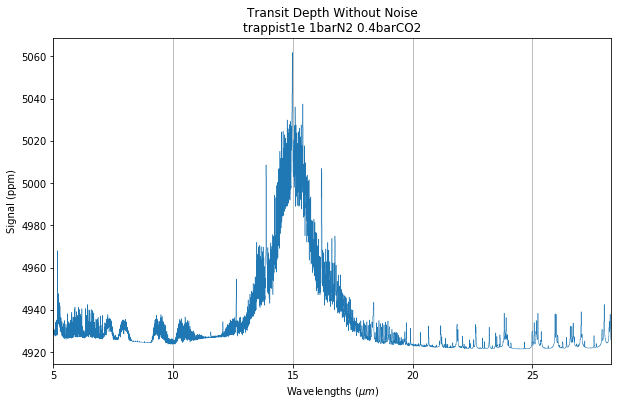

In [13]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
ax.step(
    transit.Wavelengths, transit.Transit * 1e6, linewidth=0.5, where="post")
ax.set_title(f"Transit Depth Without Noise\n{transit._title_stem}")
ax.set_xlabel(r"Wavelengths ($\mu m$)")
ax.set_ylabel("Signal (ppm)")
ax.set_xlim(*transit._plot_range)
ax.xaxis.grid(True)
fig.savefig("transit_depth_miri_mrs.png")

## Missing Species

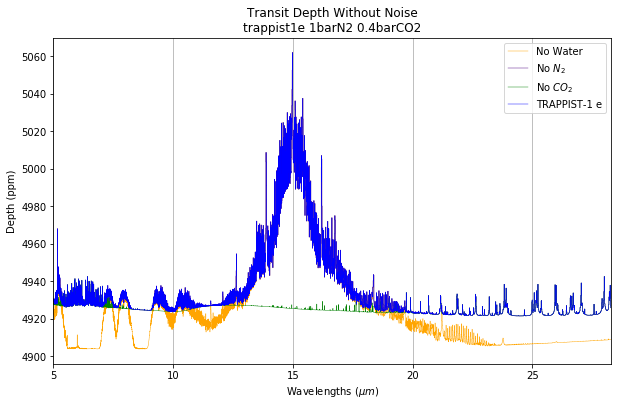

In [14]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
ax.step(
    dry.Wavelengths,
    dry.Transit * 1e6,
    linewidth=0.45,
    where="post",
    c="orange",
    label="No Water")
ax.step(
    noN2.Wavelengths,
    noN2.Transit * 1e6,
    linewidth=0.45,
    where="post",
    c="indigo",
    label="No $N_2$")
ax.step(
    noCO2.Wavelengths,
    noCO2.Transit * 1e6,
    linewidth=0.45,
    where="post",
    c="g",
    label="No $CO_2$")
ax.step(
    transit.Wavelengths,
    transit.Transit * 1e6,
    linewidth=0.45,
    where="post",
    c="b",
    label="TRAPPIST-1 e")
ax.set_title("Transit Depth Without Noise\n{}".format(dry._title_stem))
ax.set_xlabel("Wavelengths ($\mu m$)")
ax.set_ylabel("Depth (ppm)")
ax.set_xlim(*transit._plot_range)
ax.legend()
ax.xaxis.grid(True)
fig.savefig("trappist1e_with_and_without_species_miri.png")

## Ceiling Analysis

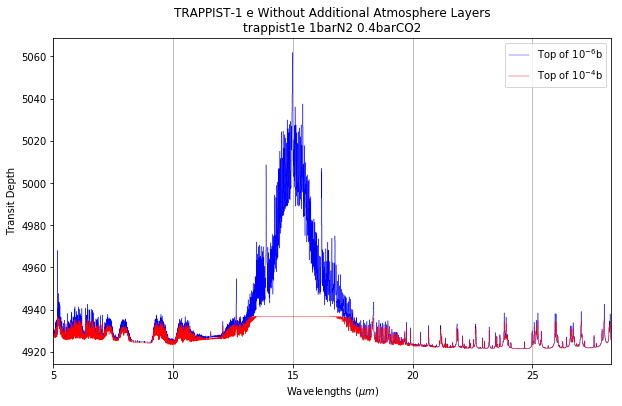

In [15]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
ax.step(
    transit.Wavelengths,
    transit.Transit * 1e6,
    linewidth=0.4,
    c="b",
    where="post",
    label="Top of $10^{-6}$b")
ax.step(
    notop.Wavelengths,
    notop.Transit * 1e6,
    linewidth=0.4,
    c="r",
    where="post",
    label="Top of $10^{-4}$b")
ax.set_title("TRAPPIST-1 e Without Additional Atmosphere Layers\n{}".format(
    notop._title_stem))
ax.set_xlabel("Wavelengths ($\mu m$)")
ax.set_ylabel("Transit Depth")
ax.set_xlim(*transit._plot_range)
ax.xaxis.grid(True)
ax.legend()
fig.savefig("MIRI_added_layers_comparison.png")

## OST

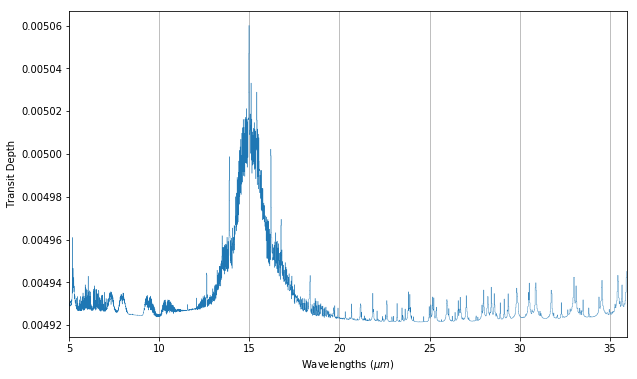

In [45]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
ax.step(ost.Wavelengths, ost.Transit, linewidth=0.4, where="post")
ax.set_xlabel("Wavelengths ($\mu m$)")
ax.set_ylabel("Transit Depth")
ax.set_xlim(*ost._plot_range)
ax.xaxis.grid(True)

In [37]:
print(ost.rad_units)

rel


# Basemap Phase Analysis

In [263]:
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap, shiftgrid

In [265]:
def return_str(fl):
    return "{:.0f}".format(fl)

AttributeError: 'numpy.float64' object has no attribute 'planet_data'

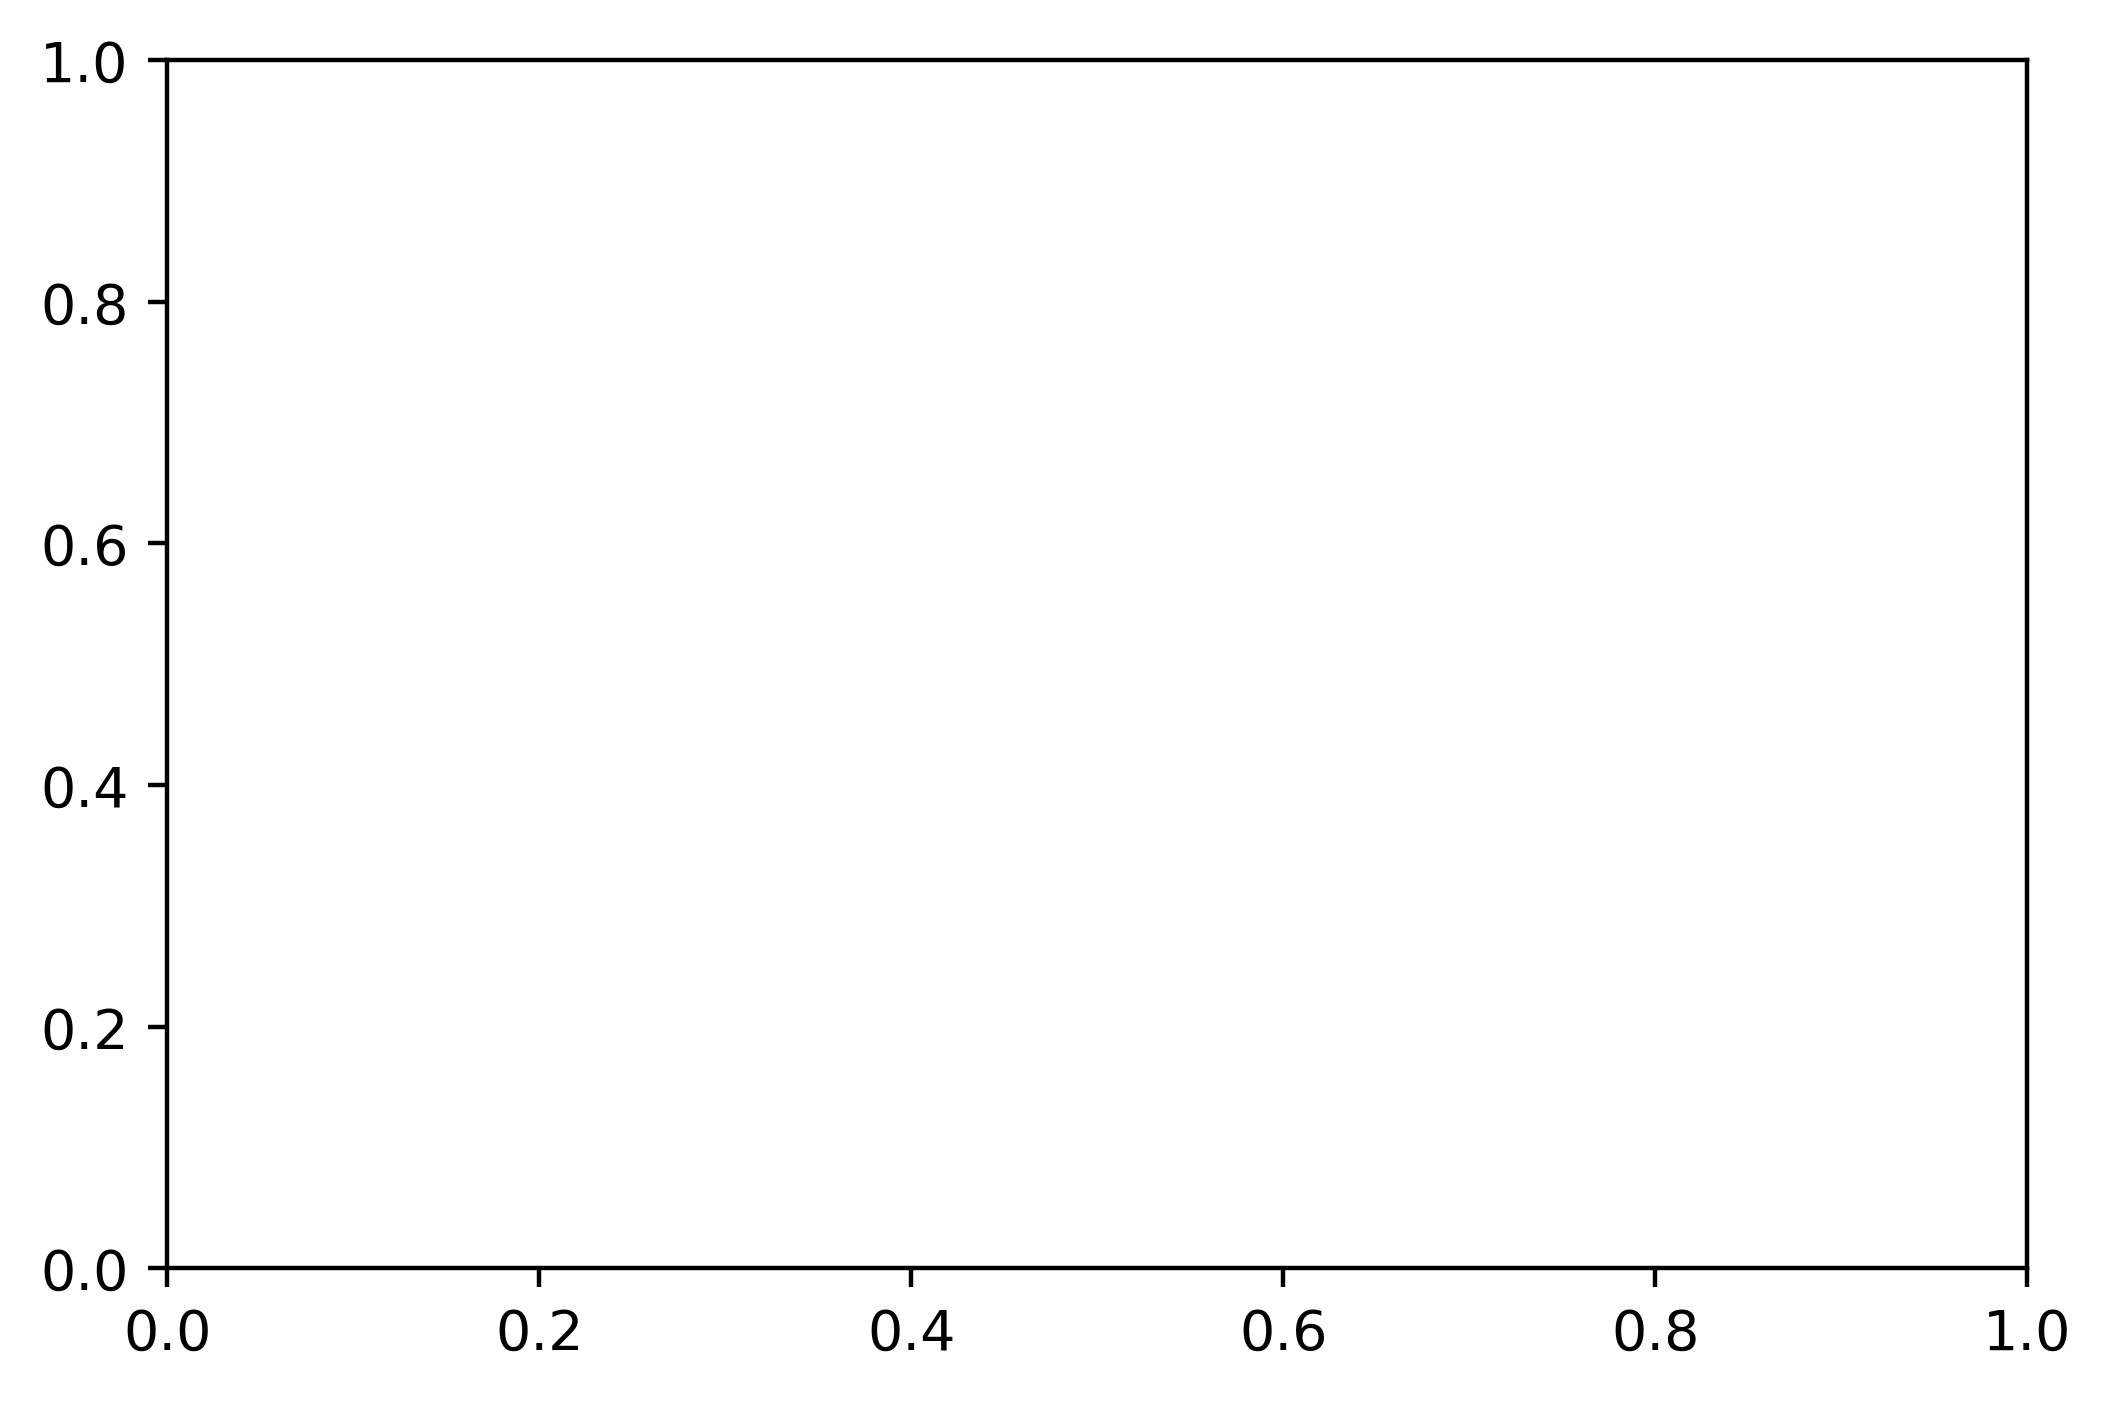

In [270]:
fig = plt.figure(figsize=(6, 4), dpi=400)
ax = fig.gca()
lats = transit.netcdf["lat"][:]
lons= transit.netcdf["lon"][:]
m = Basemap(projection="nsper", lon_0=180, lat_0=0,
#            llcrnrlat=lats[0],urcrnrlat=lats[-1],
#            llcrnrlon=lons[0],urcrnrlon=lons[-1],
            rsphere=planet.planet_data["Radius"]*1000,
            resolution="c")
m.ax = ax

cloud_abun = np.sum(transit.netcdf["CLDLIQ"][0], axis=0)
cloud_mask = np.ma.masked_array(cloud_abun, ~weight_mask)
#print(np.macloud_abun.shape)
data, lons = shiftgrid(0., cloud_mask, lons)
lons, lats = m.makegrid(72, 46)
x, y = m(lons, lats)
im = m.imshow(data, cmap=mpl.cm.get_cmap("Blues").reversed(),
              vmin=0, vmax=0.0005)
m.ax.set_title(r"Cloud Column Mass Density ($\frac{kg}{kg}$)" "\nSubstellar Side")
m.ax.set_xlabel(r"$\lambda$", labelpad=20)
m.ax.set_ylabel(r"$\delta$", labelpad=30, rotation=0)
m.drawparallels(np.arange(-90,91,45),labels=[0,1,0,0],
                fmt=return_str, xoffset=0.2e7)
m.drawmeridians(np.arange(0,360,90), labels=[0,0,0,1],
                fmt=return_str, yoffset=0.1e7)
fig.colorbar(im, format="%.5f")


# Testing

## TPC

In [277]:
phases = np.arange(0, 360, 30)
images = []
obj_list = []
successful = []

In [254]:
for i, phase in enumerate(phases):
    print(i)
    if i not in successful:
        planet = PSG.PSG("TRAPPIST-1 e")
        planet.fetch_archive()
        planet.from_cdf(file, phase=phase)
        planet.calculate(1e-7, 7)
        planet.write("MIRI-MRS", exposure_time=16, exposure_count=10, rad_units="raw")
        planet.send(keep_files=("rad", "log"))
        planet.plot_setup()
        obj_list.append(planet)
        successful.append(i)
        if phase % 90 == 0:
            images.append(planet)

0
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
90.0 270.0
    Output file written to trappist1e_1barN2_0.4barCO2_aqua_0_pro.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is trappist1e_1barN2_0.4barCO2_0_psginput.txt
    Sending to PSG
    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | The requested calculation is too expensive (by 13) - Disabling scattering.

    Ready to Make Plots
1
Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
60.0 240.0
    Output file written to trappist1e_1barN2_0.4barCO2_aqua_30_pro.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST

In [256]:
phase_lum = []
pc_chunk = planet.Wavelengths >= 17
is_transit = []
for i, phase in enumerate(phases):
    planet = np.sum(obj_list[i].Thermal[pc_chunk])
    star = np.sum(obj_list[i].Stellar[pc_chunk])
    phase_lum.append(planet/star*1e6)
    is_transit.append(obj_list[i].is_transit)
is_transit = np.array(is_transit)
phase_lum = np.array(phase_lum)

(0, 360)

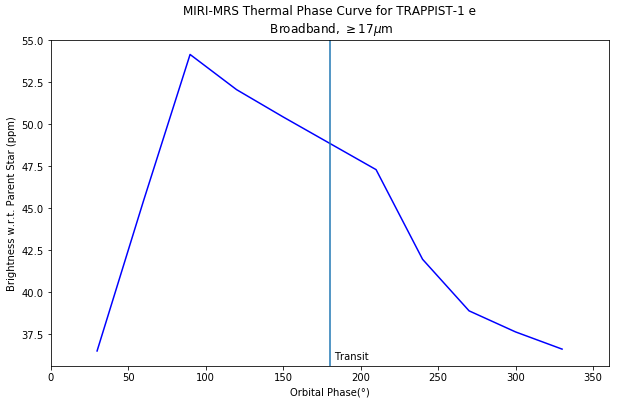

In [257]:
fig = plt.figure(figsize=(10,6))
plt.plot(phases[~is_transit], phase_lum[~is_transit],c="b")
plt.axvline(180)
plt.xlabel(u"Orbital Phase(\N{DEGREE SIGN})")
plt.ylabel("Brightness w.r.t. Parent Star (ppm)")
plt.title("MIRI-MRS Thermal Phase Curve for TRAPPIST-1 e\n"
          " Broadband, $\geq 17\mu$m")
plt.annotate("Transit",(183, 36))
plt.xlim(0, 360)


In [258]:
print(images)

[array([[-16598131.90241548, -17037396.33825067, -17476660.77408586, ...,
        -13711112.03841417, -14150376.06799932, -14589640.09758448],
       [-18733898.14605745, -19173162.55230746, -19612426.95855745, ...,
        -11575345.85394255, -12014609.85394255, -12453873.85394254],
       [-20414366.24697887, -20853630.65322887, -21292895.05947888, ...,
         -9894877.75302112, -10334141.75302112, -10773405.75302112],
       ...,
       [-20414365.28015558, -20853629.68640558, -21292894.09265558, ...,
         -9894878.71984442, -10334142.71984442, -10773406.71984442],
       [-18733894.77883403, -19173159.18508403, -19612423.59133403, ...,
        -11575349.22116597, -12014613.22116597, -12453877.22116597],
       [-16598131.90241548, -17037396.33825067, -17476660.77408586, ...,
        -13711112.03841417, -14150376.06799932, -14589640.09758448]]), array([[-16598131.90241548, -17037396.33825067, -17476660.77408586, ...,
        -13711112.03841417, -14150376.06799932, -14589640.09

In [286]:
planet = PSG.PSG("TRAPPIST-1 e")
planet.fetch_archive()
planet.from_cdf(file, phase=270)
planet.calculate(1e-7, 7)
#planet.write("MIRI-MRS", exposure_time=16,
#             exposure_count=10, rad_units="raw")
#planet.send(keep_files=("rad", "log"))
#planet.plot_setup()

Starting PSG for TRAPPIST-1 e
    Exoplanet Archive fetched. planet_data and star_data filled
    Accessing netCDF contents
    Output file written to trappist1e_1barN2_0.4barCO2_aqua_270_pro.txt
    Atmosphere Profile File Read
    Added 7 layers to the atmosphere


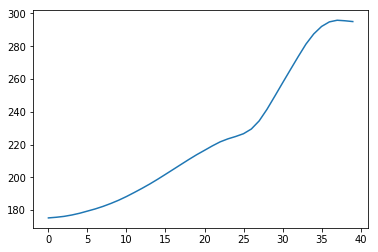

In [58]:
p0 = transit.netcdf["P0"][0]
ps = transit.netcdf["PS"][0]
hyai = transit.netcdf["hyai"][:]
hybi = transit.netcdf["hybi"][:]
hyam = transit.netcdf["hyam"][:]
hybm = transit.netcdf["hybm"][:]
t = transit.netcdf["T"][0]
r = 8.1344/transit.planet_data["MWeightDry"]*1000
g = transit.planet_data["Gravity"]
plt.plot(t[:, 0, 0])

In [66]:
k = -1
i = 0
j = 0
p1 = hyai[-1] * p0 + hybi[-1] * ps[0, 0]
p2 = hyai[-2] * p0 + hybi[-2] * ps[0, 0]
delta_z = r * t[k-1, i, j] / g * np.log(p1 / p2)
p_prime = hyam[k-1] * p0 + hybm[k-1] * ps[i, j]
z_scale = -r * t[k-1, i, j] / g * np.log(p_prime / p1)
print(delta_z, z_scale)

153.29997368534572 309.3354262423325


In [60]:
r = 8.1344/transit.planet_data["MWeightDry"]*1000

In [52]:
transit.netcdf['hyam']

<class 'netCDF4._netCDF4.Variable'>
float64 hyam(lev)
    long_name: hybrid A coefficient at layer midpoints
unlimited dimensions: 
current shape = (40,)
filling on, default _FillValue of 9.969209968386869e+36 used

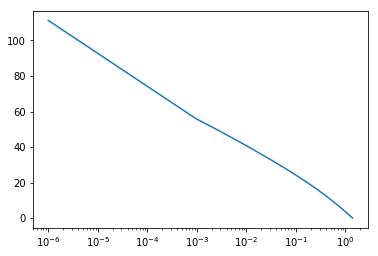

In [90]:
plt.plot(transit.atmosphere["Pressure"], transit.atmosphere["Height"])
plt.xscale("log")

In [91]:
transit.atmosphere["Height"]

0.07901443879999999
0.32079113719999997
0.7919910314
1.556831293
2.6133674231
3.9535906374
5.5592739038
7.2865002524
8.980970251999999
10.6432398614
12.2762545391


In [86]:
z = np.arange(10)
iz = z[:]
iz[2] = 5
print(z, iz)

[0 1 5 3 4 5 6 7 8 9] [0 1 5 3 4 5 6 7 8 9]
